In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./Data/housing.csv', header = None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
y = df.values[:, 13]
x = df.values[:, :13]

In [6]:
y     # continous data => regresion

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111)

In [15]:
model = Sequential()
model.add(Dense(30, input_dim = 13, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))                         # regression에서는 output layer에 activation function을 사용하지 않는다

# binary cls activation : sigmoid()
# multi cls activation : softmax()

In [16]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')     # regression 에서는 loss 로 'mean_squared_error' 를 쓴다

In [17]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs = 100, batch_size = 20)

Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 1870.8367 - val_loss: 418.9166
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 453.8241 - val_loss: 216.6223
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 168.5307 - val_loss: 146.4696
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 102.3742 - val_loss: 92.8906
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 77.5701 - val_loss: 83.3459
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 66.5905 - val_loss: 69.5687
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 61.0828 - val_loss: 67.9150
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 57.7126 - val_loss: 63.3072
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 55.9888 - val_loss: 61.6543
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 54.5473 -

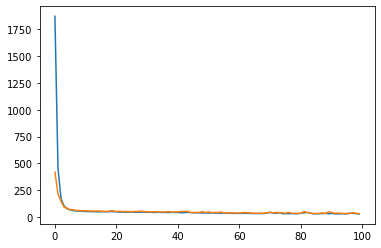

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [19]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 909us/step - loss: 39.1853


39.185325622558594

In [20]:
# 스케일링

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [22]:
model = Sequential()
model.add(Dense(30, input_dim = 13, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))             

In [23]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [24]:
hist = model.fit(x_train_sc, y_train, validation_split=0.2, epochs = 100, batch_size = 20)

Epoch 1/100
16/16 [==============================] - 0s 6ms/step - loss: 538.5395 - val_loss: 571.5735
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 509.9920 - val_loss: 534.6187
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 468.7024 - val_loss: 479.3927
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 407.6618 - val_loss: 400.3580
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 325.7673 - val_loss: 299.8138
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 230.5895 - val_loss: 200.6907
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 156.0376 - val_loss: 142.4006
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 124.7413 - val_loss: 125.2109
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 115.9326 - val_loss: 116.3511
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss:

In [25]:
model.evaluate(x_test_sc, y_test)

4/4 [==============================] - 0s 665us/step - loss: 17.7260


17.72597885131836

In [29]:
# prediction

In [30]:
preds = model.predict(x_test_sc)

In [31]:
# evaluation

In [32]:
from sklearn.metrics import r2_score

r2_score(preds, y_test)

0.7828660554544689

In [ ]:
### r2score

# 회귀 모델이 얼마나 '설명력'이 있느냐를 의미
# 예측 모델과 실제 모델이 얼마나 강한 상관관계를 가지는가

In [36]:
for i in range(10):
    pred_price = preds[i]
    real_price = y_test[i]
    print('{} - {}'.format(round(real_price), round(pred_price[0])))
    

25 - 27
30 - 29
31 - 30
20 - 19
48 - 43
22 - 27
35 - 36
16 - 17
23 - 22
10 - 14
